### Preparing data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import timedelta

In [2]:
data2 = pd.read_sas('DR2IFF_I.XPT')

In [3]:
data2 = data2.dropna()

In [4]:
data2

,SEQN,WTDRD1,WTDR2D,DR2ILINE,DR2DRSTZ,DR2EXMER,DRABF,DRDINT,DR2DBIH,DR2DAY,...,DR2IM181,DR2IM201,DR2IM221,DR2IP182,DR2IP183,DR2IP184,DR2IP204,DR2IP205,DR2IP225,DR2IP226
0,83732.0,92670.699919,69945.934107,1.0,1.0,87.0,2.0,2.0,2.0,4.0,...,5.397605e-79,5.397605e-79,5.397605e-79,3.000000e-03,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
1,83732.0,92670.699919,69945.934107,2.0,1.0,87.0,2.0,2.0,2.0,4.0,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
2,83732.0,92670.699919,69945.934107,3.0,1.0,87.0,2.0,2.0,2.0,4.0,...,1.910000e-01,5.397605e-79,5.397605e-79,7.000000e-03,1.000000e-03,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
4,83732.0,92670.699919,69945.934107,5.0,1.0,87.0,2.0,2.0,2.0,4.0,...,1.022300e+01,1.580000e-01,2.000000e-03,5.934000e+00,5.440000e-01,5.397605e-79,1.780000e-01,5.397605e-79,1.300000e-02,4.400000e-02
5,83732.0,92670.699919,69945.934107,6.0,1.0,87.0,2.0,2.0,2.0,4.0,...,3.963000e+00,5.397605e-79,5.397605e-79,5.860000e-01,3.660000e-01,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
6,83732.0,92670.699919,69945.934107,7.0,1.0,87.0,2.0,2.0,2.0,4.0,...,4.400000e-02,5.397605e-79,5.397605e-79,9.300000e-02,5.500000e-02,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
7,83732.0,92670.699919,69945.934107,8.0,1.0,87.0,2.0,2.0,2.0,4.0,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
8,83732.0,92670.699919,69945.934107,9.0,1.0,87.0,2.0,2.0,2.0,4.0,...,5.440000e-01,8.000000e-03,5.397605e-79,1.052000e+00,1.380000e-01,5.397605e-79,1.000000e-03,5.397605e-79,5.397605e-79,5.397605e-79
9,83732.0,92670.699919,69945.934107,10.0,1.0,87.0,2.0,2.0,2.0,4.0,...,5.628000e+00,1.520000e-01,5.397605e-79,3.640000e+00,2.780000e-01,5.397605e-79,1.050000e-01,1.100000e-02,1.200000e-02,1.600000e-02
10,83732.0,92670.699919,69945.934107,12.0,1.0,87.0,2.0,2.0,2.0,4.0,...,1.400000e-02,1.800000e-02,5.300000e-02,1.800000e-02,1.700000e-02,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79


In [5]:
data1 = pd.read_csv('meal.csv')
data1 = data1.dropna()

In [6]:
# removing this for now as linear regression can't be applied on datetime format
#df['DR1_020'] = pd.to_datetime(df['DR1_020'], unit='s').dt.time

In [7]:
#oneparticipant1 = data1[0:16][['DR1_020', 'DR1ICARB']].copy()
#oneparticipant2 = data2[0:23][['DR2_020', 'DR2ICARB']].copy()
day1 = data1[['DR1_020', 'DR1ICARB', 'DR1_030Z']].copy()
day2 = data2[['DR2_020', 'DR2ICARB', 'DR2_030Z']].copy()

In [8]:
day2.columns = ['time', 'CHO', 'occasion']
day1.columns = ['time', 'CHO', 'occasion']

In [9]:
total = pd.concat([day1, day2])
#total['time'] = pd.to_datetime(total['time'], unit='s').dt.time

In [10]:
#total = total.sort_values(by=['time'])
total

,time,CHO,occasion
0,27000.0,5.397605e-79,1.0
1,27000.0,3.560000e+00,1.0
2,27000.0,2.320000e+00,1.0
3,28800.0,5.397605e-79,7.0
4,32400.0,4.088000e+01,1.0
5,32400.0,2.500000e-01,1.0
6,41400.0,1.740000e+00,6.0
7,45000.0,4.867000e+01,2.0
8,45000.0,1.170000e+00,2.0
9,45000.0,2.740000e+00,2.0


In [11]:
total.isna().sum()

time        0
CHO         0
occasion    0
dtype: int64

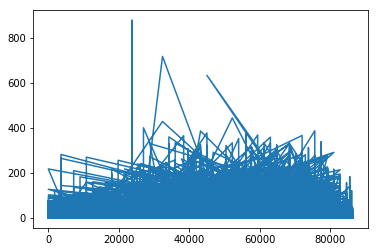

In [12]:
plt.plot(total['time'], total['CHO'])

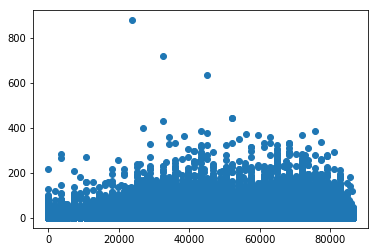

In [13]:
plt.scatter(total['time'], total['CHO'])

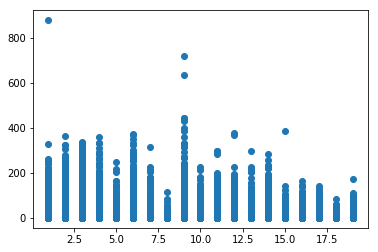

In [14]:
plt.scatter(total['occasion'], total['CHO'])

In [15]:
total.shape

(200532, 3)

In [16]:
occasiondict = {
    1 : { 'name' : 'Breakfast\nDesayano', 'count' : 0, 'cho' : 0},
    2 : { 'name' : 'Lunch\nAlmuerzo\nCena', 'count' : 0, 'cho' : 0},
    3 : { 'name' : 'Dinner', 'count' : 0, 'cho' : 0},
    4 : { 'name' : 'Supper', 'count' : 0, 'cho' : 0},
    5 : { 'name' : 'Brunch', 'count' : 0, 'cho' : 0},
    6 : { 'name' : 'Snack\nMerienda\nBotana\nBocadillo\nTentempie', 'count' : 0, 'cho' : 0},
    7 : { 'name' : 'Drink\nBebida', 'count' : 0, 'cho' : 0},
    8 : { 'name' : 'Infant feeding', 'count' : 0, 'cho' : 0},
    9 : { 'name' : 'Extended consumption\nEntre comida', 'count' : 0, 'cho' : 0},
}

In [17]:
occasiondict

{1: {'name': 'Breakfast\nDesayano', 'count': 0, 'cho': 0},
 2: {'name': 'Lunch\nAlmuerzo\nCena', 'count': 0, 'cho': 0},
 3: {'name': 'Dinner', 'count': 0, 'cho': 0},
 4: {'name': 'Supper', 'count': 0, 'cho': 0},
 5: {'name': 'Brunch', 'count': 0, 'cho': 0},
 6: {'name': 'Snack\nMerienda\nBotana\nBocadillo\nTentempie',
  'count': 0,
  'cho': 0},
 7: {'name': 'Drink\nBebida', 'count': 0, 'cho': 0},
 8: {'name': 'Infant feeding', 'count': 0, 'cho': 0},
 9: {'name': 'Extended consumption\nEntre comida', 'count': 0, 'cho': 0}}

In [18]:
for row, value in total.iterrows():
    if value['occasion'] == 10:
        value['occasion'] = 1
    elif value['occasion'] == 11 or value['occasion'] == 14 or value['occasion'] == 12:
        value['occasion'] = 2
    elif value['occasion'] == 13 or value['occasion'] == 16 or value['occasion'] == 17 or value['occasion'] == 18:
        value['occasion'] = 6
    elif value['occasion'] == 19:
        value['occasion'] = 7
    elif value['occasion'] == 15:
        value['occasion'] = 9

In [19]:
for key in occasiondict.keys():
    for row, value in total.iterrows():
        if value['occasion'] == key:
            occasiondict[key]['count'] += 1
            occasiondict[key]['cho'] += value['CHO']

In [20]:
occasiondict

{1: {'name': 'Breakfast\nDesayano', 'count': 42592, 'cho': 674850.9599999961},
 2: {'name': 'Lunch\nAlmuerzo\nCena',
  'count': 53509,
  'cho': 941158.9600000129},
 3: {'name': 'Dinner', 'count': 41146, 'cho': 770939.4100000007},
 4: {'name': 'Supper', 'count': 9369, 'cho': 170285.26999999955},
 5: {'name': 'Brunch', 'count': 1550, 'cho': 26124.58000000002},
 6: {'name': 'Snack\nMerienda\nBotana\nBocadillo\nTentempie',
  'count': 35190,
  'cho': 662414.2299999926},
 7: {'name': 'Drink\nBebida', 'count': 9506, 'cho': 98489.29999999961},
 8: {'name': 'Infant feeding', 'count': 4129, 'cho': 38467.91999999995},
 9: {'name': 'Extended consumption\nEntre comida',
  'count': 3541,
  'cho': 60039.62999999992}}

In [21]:
occasionnames = []
occasioncho = []
for key in occasiondict: 
    occasionnames.append(occasiondict[key]['name'])
    occasioncho.append(occasiondict[key]['cho']/occasiondict[key]['count'])
print(occasionnames)
print(occasioncho)

['Breakfast\nDesayano', 'Lunch\nAlmuerzo\nCena', 'Dinner', 'Supper', 'Brunch', 'Snack\nMerienda\nBotana\nBocadillo\nTentempie', 'Drink\nBebida', 'Infant feeding', 'Extended consumption\nEntre comida']
[15.844547332832366, 17.588797398568705, 18.736679385602507, 18.17539438574016, 16.854567741935497, 18.823933788007746, 10.360751104565496, 9.316522160329365, 16.955557752047422]


In [22]:
occasionnames

['Breakfast\nDesayano',
 'Lunch\nAlmuerzo\nCena',
 'Dinner',
 'Supper',
 'Brunch',
 'Snack\nMerienda\nBotana\nBocadillo\nTentempie',
 'Drink\nBebida',
 'Infant feeding',
 'Extended consumption\nEntre comida']

In [23]:
occasioncho

[15.844547332832366,
 17.588797398568705,
 18.736679385602507,
 18.17539438574016,
 16.854567741935497,
 18.823933788007746,
 10.360751104565496,
 9.316522160329365,
 16.955557752047422]

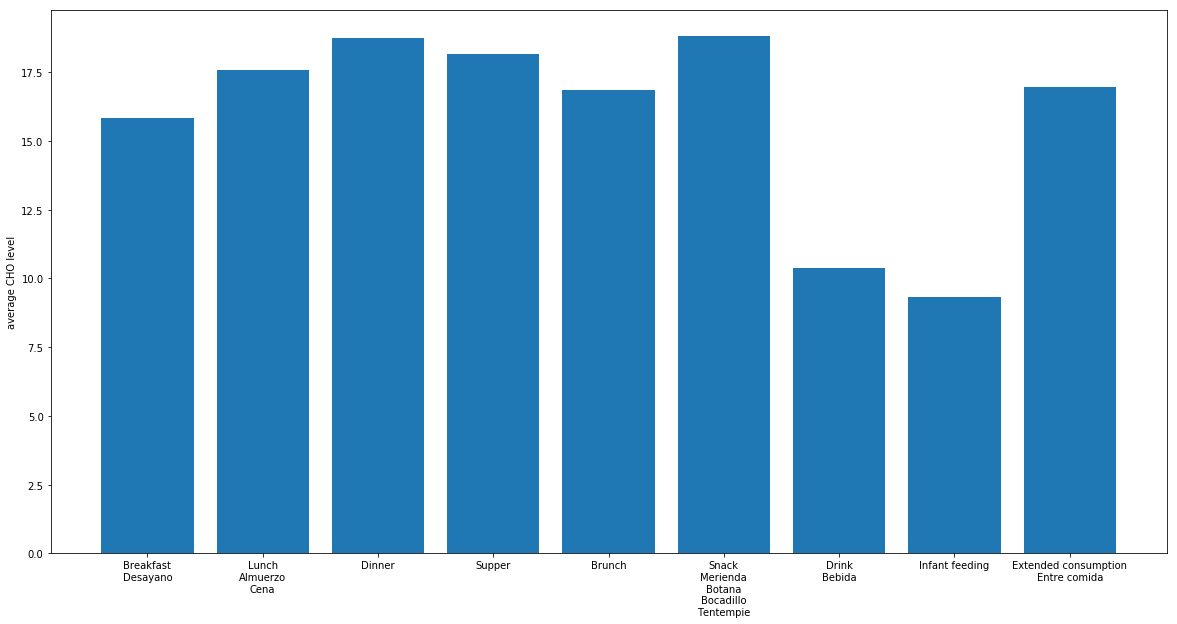

In [24]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.bar(np.arange(len(occasionnames)), occasioncho)
plt.xticks(np.arange(len(occasionnames)), occasionnames)
plt.ylabel('average CHO level')
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

In [25]:
occasioncho.index(max(occasioncho))

5

In [26]:
occasionnames[5]

'Snack\nMerienda\nBotana\nBocadillo\nTentempie'

In [27]:
group = total[['CHO', 'occasion']].copy()
group.head()

,CHO,occasion
0,5.397605e-79,1.0
1,3.560000e+00,1.0
2,2.320000e+00,1.0
3,5.397605e-79,7.0
4,4.088000e+01,1.0


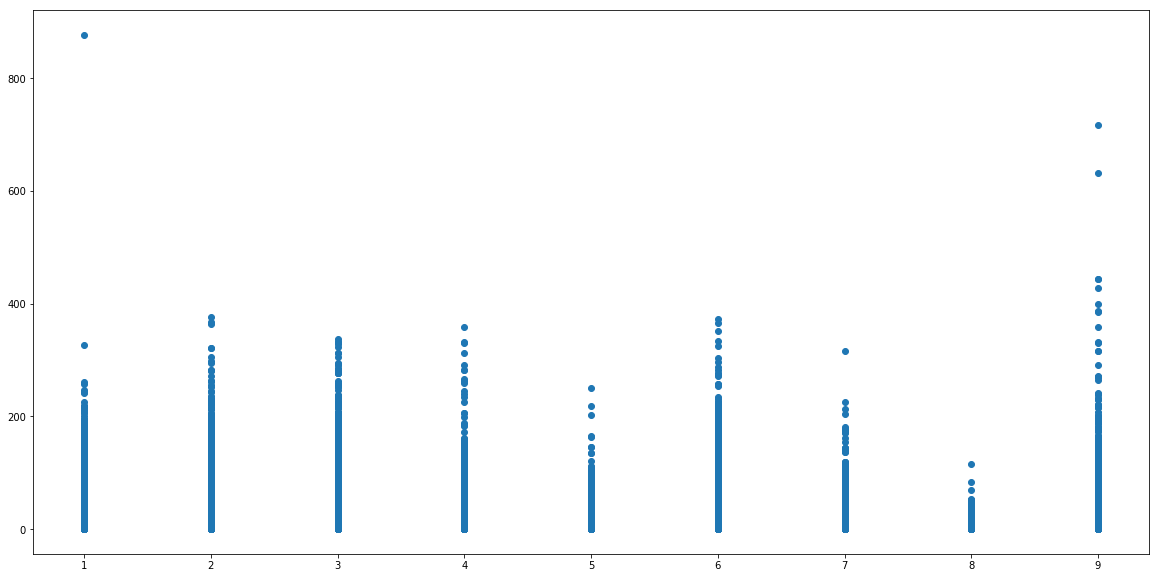

In [28]:
plt.scatter(group['occasion'], group['CHO'])

### K means Clustering

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9) 
kmeans.fit(group)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 12.70019913   3.54093923]
 [ 58.06934251   3.06884406]
 [122.45745632   3.34800839]
 [ 40.03419642   3.14325686]
 [  1.73985998   3.25981266]
 [ 25.4578527    3.22123116]
 [316.66776596   4.54255319]
 [ 84.42063709   3.15108077]
 [184.46230769   3.78241758]]


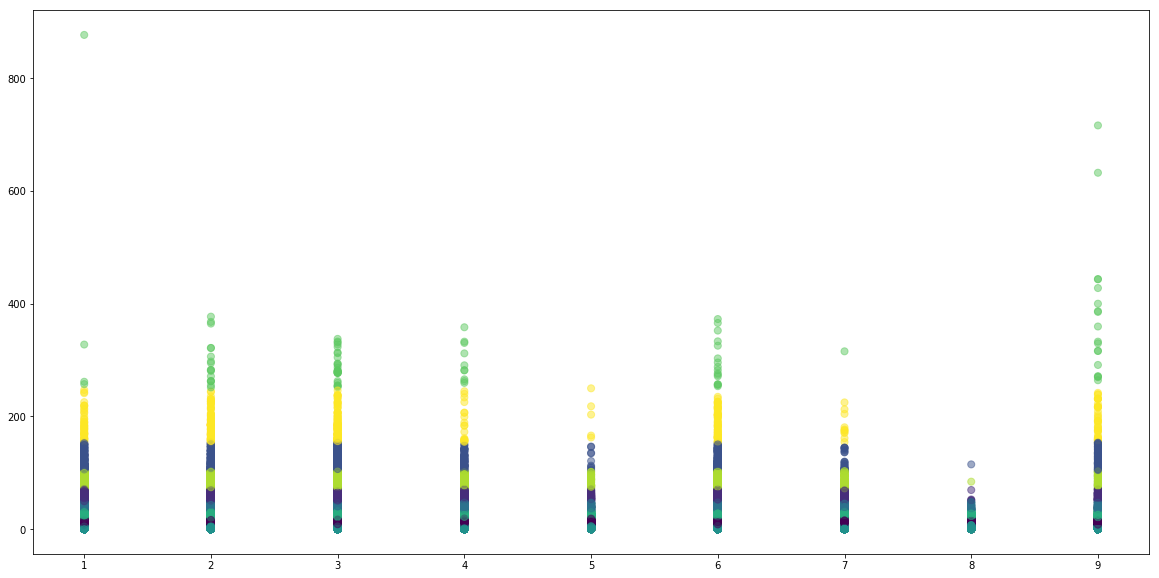

In [31]:
plt.scatter(group['occasion'], group['CHO'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)

In [32]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = group.index.values
cluster_map['cluster'] = kmeans.labels_

In [33]:
cluster1 = cluster_map[cluster_map.cluster == 1]
cluster2 = cluster_map[cluster_map.cluster == 2]
cluster3 = cluster_map[cluster_map.cluster == 3]
cluster4 = cluster_map[cluster_map.cluster == 4]
cluster5 = cluster_map[cluster_map.cluster == 5]
cluster6 = cluster_map[cluster_map.cluster == 6]
cluster7 = cluster_map[cluster_map.cluster == 7]
cluster8 = cluster_map[cluster_map.cluster == 8]
cluster0 = cluster_map[cluster_map.cluster == 0]

In [34]:
cluster1df = pd.DataFrame()
for row, value in cluster1.iterrows():
    index = value['data_index']
    cluster1df = cluster1df.append(total.loc[index])

In [35]:
cluster1df.head()

,time,CHO,occasion
14,64800.0,59.61,4.0
14,54900.0,25.91,6.0
31,44100.0,53.25,3.0
31,66600.0,21.21,3.0
37,61200.0,54.73,4.0


In [36]:
cluster2df = pd.DataFrame()
for row, value in cluster2.iterrows():
    index = value['data_index']
    cluster2df = cluster2df.append(total.loc[index])

In [37]:
cluster2df.head()

,time,CHO,occasion
678,75600.0,117.65,6.0
678,64800.0,0.45,3.0
1194,68400.0,134.68,9.0
1194,68400.0,35.14,3.0
1249,72000.0,119.59,3.0


In [38]:
cluster0df = pd.DataFrame()
for row, value in cluster0.iterrows():
    index = value['data_index']
    cluster0df = cluster0df.append(total.loc[index])

In [39]:
cluster0df.tail()

,time,CHO,occasion
100659,28800.0,1.94,1.0
100659,58500.0,12.15,6.0
100674,25200.0,7.63,1.0
100674,57600.0,8.29,6.0
100678,70200.0,8.57,3.0


In [40]:
cluster3df = pd.DataFrame()
for row, value in cluster3.iterrows():
    index = value['data_index']
    cluster3df = cluster3df.append(total.loc[index])

In [41]:
cluster3df.head()

,time,CHO,occasion
4,32400.0,4.088000e+01,1.0
4,26100.0,3.823000e+01,1.0
7,45000.0,4.867000e+01,2.0
7,37800.0,5.397605e-79,6.0
19,46800.0,4.723000e+01,9.0


In [42]:
cluster4df = pd.DataFrame()
for row, value in cluster4.iterrows():
    index = value['data_index']
    cluster4df = cluster4df.append(total.loc[index])

In [43]:
cluster5df = pd.DataFrame()
for row, value in cluster5.iterrows():
    index = value['data_index']
    cluster5df = cluster5df.append(total.loc[index])

In [44]:
cluster6df = pd.DataFrame()
for row, value in cluster6.iterrows():
    index = value['data_index']
    cluster6df = cluster6df.append(total.loc[index])

In [45]:
cluster7df = pd.DataFrame()
for row, value in cluster7.iterrows():
    index = value['data_index']
    cluster7df = cluster7df.append(total.loc[index])

In [46]:
cluster8df = pd.DataFrame()
for row, value in cluster8.iterrows():
    index = value['data_index']
    cluster8df = cluster8df.append(total.loc[index])

### Prediction 

In [47]:
def prepare_data(cluster_name):
    cluster_name = cluster_name.sort_values(by=['time'])
    cluster_name = cluster_name.drop(['occasion'], axis=1)
    cluster_name = pd.concat([first_row, cluster_name]).reset_index(drop = True)
    cluster_name = cluster_name.append({'time': 0, 'CHO': 0} , ignore_index=True)
    X = cluster_name[0:(len(cluster_name)-1)]
    y = cluster_name[1:(len(cluster_name))]
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
    tup = (X_train, X_test, y_train, y_test)
    return (tup)

In [48]:
def regression(X_train, X_test, y_train, y_test):
    lr = LinearRegression().fit(X_train,y_train)
    train_score = lr.score(X_train, y_train)*100
    test_score = lr.score(X_test, y_test)*100
    y_pred = lr.predict(X_test)
    r_score = r2_score(y_test, y_pred)*100
    tup_score = (train_score, test_score, r_score)
    return (tup_score)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
first_row = pd.DataFrame({'time': 0, 'CHO': 0}, index =[0])

#### Prediction on Cluster0

In [52]:
tup = prepare_data(cluster0df)
tup_score = regression(tup[0], tup[1], tup[2], tup[3])
print(tup_score)

(99.95655353874571, 99.9997259162833, 50.04780315230486)


#### Prediction on Cluster1

In [53]:
tup = prepare_data(cluster1df)
tup_score = regression(tup[0], tup[1], tup[2], tup[3])
print(tup_score)

(99.99888779124214, 99.37264012184465, 49.80132436325096)


#### Prediction on cluster 2

In [54]:
tup = prepare_data(cluster2df)
tup_score = regression(tup[0], tup[1], tup[2], tup[3])
print(tup_score)

(98.67236062671653, 99.97929592798549, 50.283122577033815)


#### Prediction on Cluster 3

In [55]:
tup = prepare_data(cluster3df)
tup_score = regression(tup[0], tup[1], tup[2], tup[3])
print(tup_score)

(99.99937251912786, 99.66761375978297, 50.0838153246153)


#### Prediction on Cluster 4

In [56]:
tup = prepare_data(cluster4df)
tup_score = regression(tup[0], tup[1], tup[2], tup[3])
print(tup_score)

(99.97903946215419, 99.99984538542525, 50.10670319510222)


#### Prediction on Cluster 5

In [57]:
tup = prepare_data(cluster5df)
tup_score = regression(tup[0], tup[1], tup[2], tup[3])
print(tup_score)

(99.93817008343885, 99.99963349857578, 50.069905201195894)


#### Prediction on Cluster 6

In [58]:
tup = prepare_data(cluster6df)
tup_score = regression(tup[0], tup[1], tup[2], tup[3])
print(tup_score)

(83.10370795652119, 97.40919195414283, 47.92604079478144)


#### Prediction on Cluster 7

In [59]:
tup = prepare_data(cluster7df)
tup_score = regression(tup[0], tup[1], tup[2], tup[3])
print(tup_score)

(99.99618053818125, 98.66790914998546, 49.52144270913333)


#### Prediction on Cluster 8

In [60]:
tup = prepare_data(cluster8df)
tup_score = regression(tup[0], tup[1], tup[2], tup[3])
print(tup_score)

(95.84437989194215, 99.8958007764579, 50.025076319626784)
